In [294]:
%matplotlib inline
import sklearn
import numpy as np
import matplotlib
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection

In [292]:
#Read in data into a Data Frame
df = pd.read_csv("train.csv")

#Split data into training and testing sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df.ix[:,1:],df.ix[:,0] , test_size=0.2, random_state=1)

In [293]:
from sklearn.preprocessing import StandardScaler
#Create Scaler to standardize by scaling and shifting the data
scaler = StandardScaler()  

#Train scaler only on training data then transform
scaler.fit(X_train)  
X_train = scaler.transform(X_train) 

#Transform X_test using trained scaler
X_test = scaler.transform(X_test)  
X_total = scaler.transform(df.ix[:,1:])  

In [291]:
import pickle
testv = pickle.load( open( "save.p", "rb" ) )
testv

[mean: 0.90539, std: 0.00408, params: {'alpha': 0.10000000000000001, 'hidden_layer_sizes': (10, 5)},
 mean: 0.92839, std: 0.00319, params: {'alpha': 0.10000000000000001, 'hidden_layer_sizes': (30, 5)},
 mean: 0.94250, std: 0.00269, params: {'alpha': 0.10000000000000001, 'hidden_layer_sizes': (50, 5)},
 mean: 0.94036, std: 0.00333, params: {'alpha': 0.10000000000000001, 'hidden_layer_sizes': (60, 5)},
 mean: 0.89875, std: 0.00425, params: {'alpha': 0.01, 'hidden_layer_sizes': (10, 5)},
 mean: 0.92765, std: 0.00330, params: {'alpha': 0.01, 'hidden_layer_sizes': (30, 5)},
 mean: 0.93625, std: 0.00689, params: {'alpha': 0.01, 'hidden_layer_sizes': (50, 5)},
 mean: 0.94140, std: 0.00350, params: {'alpha': 0.01, 'hidden_layer_sizes': (60, 5)},
 mean: 0.90979, std: 0.00684, params: {'alpha': 0.001, 'hidden_layer_sizes': (10, 5)},
 mean: 0.92872, std: 0.00627, params: {'alpha': 0.001, 'hidden_layer_sizes': (30, 5)},
 mean: 0.94214, std: 0.00301, params: {'alpha': 0.001, 'hidden_layer_sizes': (

In [279]:
alpha = 0.001
hidden_layer_sizes = (60,5)
clf = MLPClassifier(algorithm='l-bfgs', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes)

In [282]:
def plotter(train_scores,test_scores,train_sizes,xlabel,ylabel,title,filename):
    #plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(title)
    plt.savefig(filename)
    plt.show()



In [280]:
from sklearn.learning_curve import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, train_sizes = np.linspace(.1,.99, num = 10), cv=5)

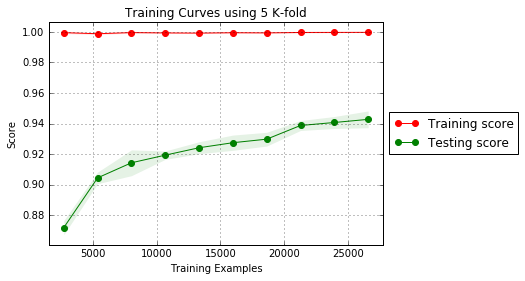

In [288]:
import matplotlib.pyplot as plt
plotter(train_scores,test_scores,train_sizes,"Training Examples", "Score", "Training Curves using 5 K-fold", "Learning_Curves");

The Learning Curves shows us that we continue to see an increasing in the performance of the model as we add more and more samples, which could be due to a complex model that begins to decrease its variance with more samples. This could also potnetially be corrrected if we increaste the regularization penalty if more samples are not available.

We can see from this plot that the amount of 

In [ ]:
from sklearn.learning_curve import validation_curve
train_scores_val, test_scores_val = validation_curve(clf, X_train,y_train, param_name="alpha", param_range=10.0 ** -np.arange(1, 7), cv = 5,scoring="accuracy")


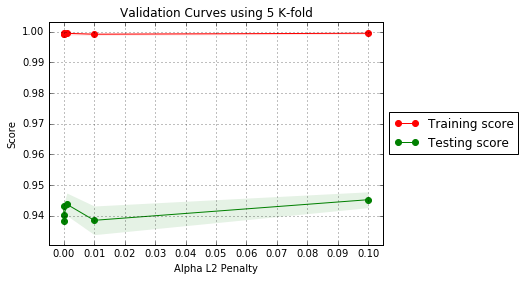

In [289]:
plotter(train_scores_val,test_scores_val,10.0 ** -np.arange(1, 7),"Alpha L2 Penalty", "Score", "Validation Curves using 5 K-fold","Training_Curves");

The Validation Curves tells us that if we keep increasing the L2 penalty (Regularization) we may continue to see an increase in the performance of the Neural Network. There could be a large benefit of creating a more complex model using additional hidden layers. However the drawback to this is that the training time becomes larger as the complexity of the Neural Network (Additional Layers) increases.

Once I take the class using distributed systems I will look at creating plots with increasing complexity

In [290]:
clf

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=0.001,
       batch_size=200, beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(60, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)